In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import torch
import re
from sklearn.metrics import balanced_accuracy_score, roc_auc_score,accuracy_score,precision_recall_fscore_support
from Constants import *
from Misc import *
from Utils import *
from Preprocessing import DTDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
get_tt_split()

([5,
  6,
  8,
  11,
  13,
  14,
  15,
  16,
  17,
  18,
  21,
  23,
  24,
  26,
  27,
  28,
  32,
  33,
  37,
  38,
  39,
  40,
  41,
  42,
  48,
  49,
  50,
  51,
  53,
  55,
  56,
  57,
  60,
  64,
  65,
  67,
  69,
  71,
  74,
  75,
  78,
  79,
  80,
  81,
  82,
  87,
  88,
  91,
  94,
  96,
  99,
  103,
  109,
  116,
  119,
  120,
  121,
  125,
  148,
  150,
  153,
  178,
  181,
  183,
  185,
  186,
  188,
  191,
  192,
  193,
  196,
  197,
  198,
  200,
  201,
  203,
  204,
  205,
  206,
  207,
  210,
  212,
  213,
  214,
  216,
  218,
  219,
  220,
  221,
  222,
  223,
  225,
  226,
  229,
  230,
  231,
  232,
  233,
  234,
  235,
  237,
  238,
  239,
  240,
  241,
  243,
  244,
  246,
  247,
  248,
  249,
  251,
  252,
  253,
  255,
  256,
  257,
  258,
  259,
  260,
  261,
  262,
  263,
  265,
  266,
  269,
  270,
  273,
  275,
  276,
  277,
  278,
  280,
  281,
  282,
  283,
  285,
  289,
  2000,
  2002,
  2003,
  2004,
  2007,
  2008,
  2009,
  2010,
  2011,
  2012,
  2013,


In [7]:
data = DTDataset(use_smote=False)
data.processed_df[Const.timeseries_outcomes]

,OS (Calculated),Locoregional control (Time),FDM (months),time_to_event
id,,,,
3,6.033333,4.700000,6.033333,4.700000
5,7.333333,7.333333,7.333333,6.000000
6,7.466667,7.466667,7.466667,6.000000
7,7.800000,7.800000,7.800000,6.000000
8,8.066667,8.066667,8.066667,8.066667
...,...,...,...,...
10201,143.200000,143.200000,143.200000,143.200000
10202,144.366667,144.366667,144.366667,6.000000
10203,148.366667,148.366667,136.033333,136.033333


In [8]:
from DeepSurvivalModels import *
format_tte_outcomes(data,Const.timeseries_outcomes)[0][2].sum()

tensor(57)

In [9]:
xtr,xtst,ytr,ytst = transition_sample(3,data)
xtr.shape

torch.Size([389, 79])

In [10]:
from DeepSurvivalModels import *
test = DSM(xtr.shape[1],dist="Weibull")
test.fit_normalizer(xtr)
test = test.time_to_event(xtr)
test['predictions'][0].shape, test['5%'][0].shape, len(test['predictions']),len(test['5%'])

lmeans tensor([[-0.4515,  0.0246, -0.1544],
        [ 0.2401,  0.0622, -0.3915],
        [-0.5320,  0.2485,  0.4154],
        ...,
        [-0.0025, -0.3575,  0.1645],
        [-0.1631,  1.1037,  0.3925],
        [-0.1496, -0.3375, -0.1078]], grad_fn=<StackBackward0>) logits tensor([[0.3334, 0.3333, 0.3333],
        [0.3335, 0.3333, 0.3332],
        [0.3334, 0.3333, 0.3333],
        ...,
        [0.3334, 0.3334, 0.3332],
        [0.3335, 0.3332, 0.3332],
        [0.3333, 0.3334, 0.3333]], grad_fn=<ExpBackward0>)
lmeans tensor([[-0.6174,  0.1746,  0.2631],
        [-0.3305, -0.1463,  0.0018],
        [ 0.0261,  0.1783,  0.4251],
        ...,
        [ 0.3513, -0.2523,  0.1269],
        [ 0.1574,  0.5098, -0.4083],
        [-0.2106, -0.0384, -0.2164]], grad_fn=<StackBackward0>) logits tensor([[0.3334, 0.3332, 0.3334],
        [0.3334, 0.3333, 0.3333],
        [0.3334, 0.3334, 0.3333],
        ...,
        [0.3333, 0.3333, 0.3335],
        [0.3333, 0.3333, 0.3335],
        [0.3334, 0.3333

(torch.Size([389]), torch.Size([389]), 4, 4)

In [11]:
for i,ii,iii in zip(test['predictions'][0],test['5%'][0],test['95%'][0]):
    print(ii.item(),i.item(),iii.item())

0.8216379880905151 0.8394665718078613 1.5367493629455566
1.0478953123092651 1.00394606590271 5.514124393463135
1.0809457302093506 1.1280899047851562 1.5376044511795044
0.7547747492790222 1.0775535106658936 1.0290095806121826
0.889220654964447 1.0711241960525513 1.3785631656646729
0.8340281248092651 0.9158028960227966 1.0893265008926392
0.7024891376495361 0.8612036108970642 1.2850292921066284
0.7774495482444763 2.396879196166992 1.649431824684143
0.9400253891944885 1.185241937637329 1.6046415567398071
0.9146273732185364 1.180619239807129 1.3540680408477783
0.8673765659332275 1.0102274417877197 1.3370808362960815
0.6372402906417847 0.7264077067375183 1.1391834020614624
0.9513417482376099 2.332573652267456 1.3246465921401978
0.7834373116493225 1.5862302780151367 1.806930661201477
1.2175058126449585 1.7176393270492554 3.5244452953338623
0.9394406080245972 1.2008848190307617 1.3084328174591064
1.1543164253234863 1.461238145828247 4.172946929931641
0.7703789472579956 0.8732736706733704 1.004

In [12]:
# test, loss, metrics = train_dsm(data,k=10,dist="Weibull")
# test.time_to_event(xtr)

In [13]:
test2, loss2, metrics2 = train_dsm(data,k=3,dist="LogNormal",layers=[100],elbo=False,activation='Tanh')
# test2.time_to_event(xtr)

best pretrain loss 13596.567315115255 epochs 1205
val loss 1.0369075922731303
val metrics {'OS (Calculated)': {12: {'roc_score': 0.4947552447552448, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.7045454545454546, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.7060849598163031, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6727099236641222, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.6124100719424461, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.6063931297709924, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.621259842519685, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.6023842917251051, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.5862884160756501, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.7112514351320322, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6

/data/DigitalTwinVis/python/DeepSurvivalModels.py:487: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3576.)
  survival = [torch.exp(c).T for c in cdf]


val loss 1.0183216338171857
val metrics {'OS (Calculated)': {12: {'roc_score': 0.5314685314685315, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.7105614973262032, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.7106773823191733, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6521946564885497, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5818345323741008, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5830152671755725, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.6019685039370078, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5866058906030855, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.541371158392435, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.6653272101033295, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6472868217054264, 'f1': 0.9347826086956522, 'matthe

val loss 1.1020543793154225
val metrics {'OS (Calculated)': {12: {'roc_score': 0.5034965034965035, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6570855614973261, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6572904707233066, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6650763358778626, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.6151079136690647, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5610687022900763, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5704724409448818, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.564516129032258, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.5366430260047281, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.6245694603903559, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6705426356589147, 'f1': 0.9347826086956522, 'matthe

val loss 1.5368754312651565
val metrics {'OS (Calculated)': {12: {'roc_score': 0.49125874125874125, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5949197860962567, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6010332950631457, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6312022900763359, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5197841726618705, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.49761450381679384, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.49094488188976376, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5091164095371669, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.49527186761229314, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5459242250287025, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6068044788975022, 'f1': 0.9347826086956522, 'm

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
def result_df(metrics):
    result_df = []
    for outcome, outcomeresults in metrics.items():
        for months,scores in outcomeresults.items():
            for metric, score in scores.items():
                entry = {
                    'outcome': outcome,
                    'months': months,
                    'metric': metric,
                    'value': score
                }
                result_df.append(entry)
    return pd.DataFrame(result_df)
m2_df = result_df(metrics2)

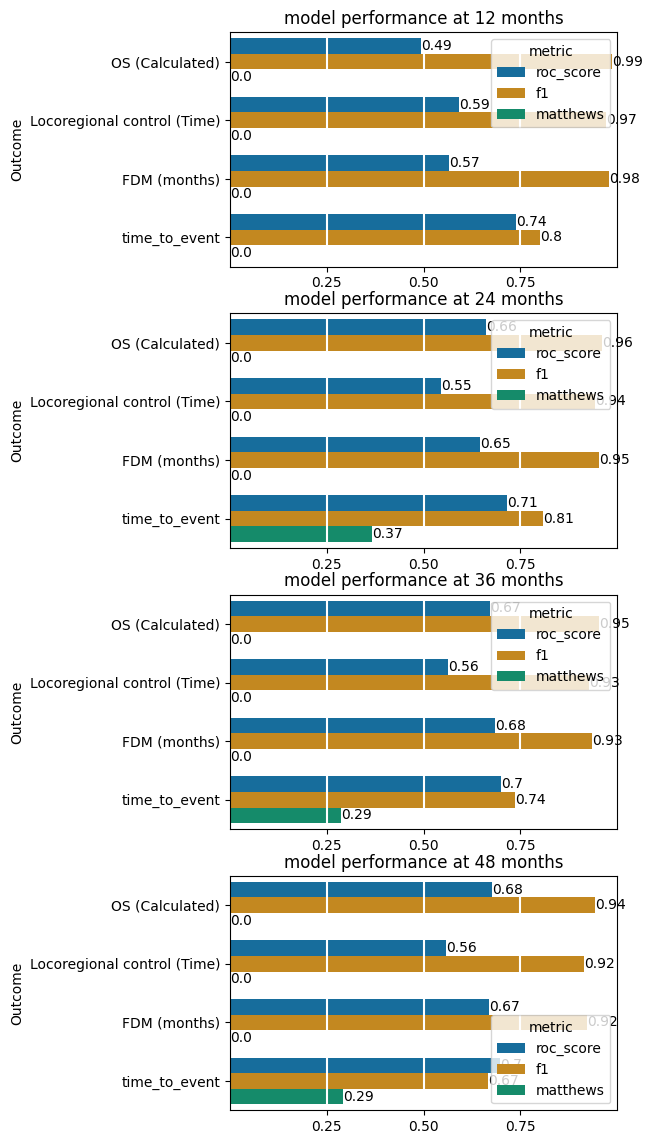

In [64]:
def plot_timeseries_outcomes_alt(df):
    months = df.months.unique()
    fig,axes = plt.subplots(len(months),1,figsize=(5,14))
    for i,month in enumerate(sorted(months)):
        ax = axes[i]
        subdf = df[df.months == month]
        sns.barplot(
            data=subdf,
            hue='metric',
            y='outcome',
            x='value',
            orient='h',
            ax=ax,
            palette='colorblind',
        )
        ax.set_title('model performance at ' + str(month) + ' months')
        ax.set_ylabel('Outcome')
        ax.set_xlabel('')
        ax.axvline(.5,c='white')
        ax.axvline(.75,c='white')
        ax.axvline(.25,c="white")
        ax.set_xlim(0,1)
        ax.set_xticks([.25,.5,.75])
    #     ax.get_legend().remove()
        for container in ax.containers:
            for patch,value in zip(container.patches,container.datavalues):
                x,y = patch.xy
                x = x + patch._width
                y = y + (patch._height/2)
                value = np.round(value,2)
                ax.text(x,y,str(value),verticalalignment='center')
plot_timeseries_outcomes_alt(m2_df)

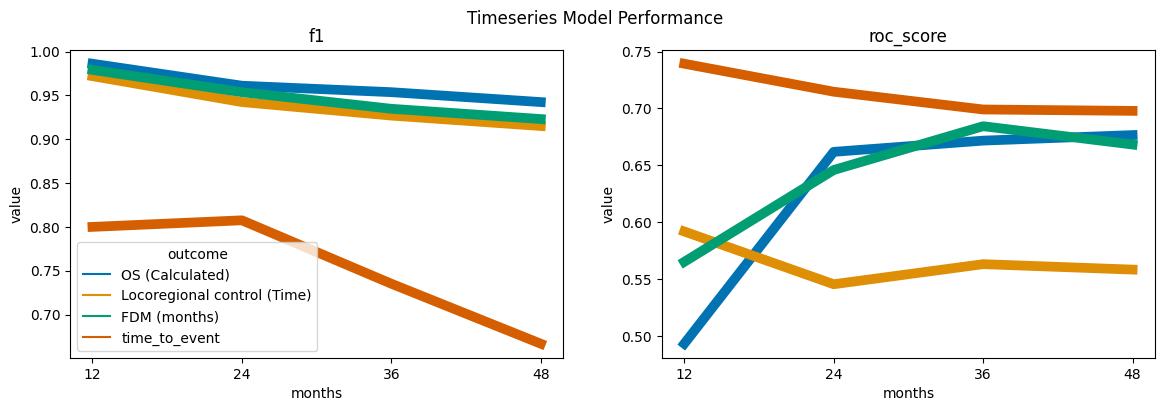

In [63]:
def plot_timeseries_outcomes(df):
    metrics = df.metric.unique()
    metrics =[m for m in metrics if m != 'matthews']
    fig,axes = plt.subplots(1,len(metrics),figsize=(14,4))
    for i,metric in enumerate(sorted(metrics)):
        ax = axes[i]
        subdf = df[df.metric == metric]
        sns.lineplot(
            data=subdf,
            hue='outcome',
            y='value',
            x='months',
            ax=ax,
            palette='colorblind',
            linewidth=7,
            legend='brief' if i == 0 else False,
        )
        ax.set_title(metric)
        ax.set_xticks([12,24,36,48])
    fig.suptitle('Timeseries Model Performance')

plot_timeseries_outcomes(m2_df)

In [66]:
#model gridsearch
from DeepSurvivalModels import *
import pickle
layer_options = [
    [100,100],
    [100],
    [100,100,100]
]
results = []
best_results = {'criteria': 0}
tempfile = '../resources/outcomeDSMTemp.pt'
main_file = '../resources/outcomeDSM.pt'
for layers in layer_options:
    for activation in ['Tanh','Sigmoid','ReLU6']:
        for dist in ['LogNormal']:
            for k in [3,6,9]:
                for elbo in [False,True]:
                    try:
                        args = {'k': k,'dist': dist,'layers':layers,'activation':activation,'elbo':elbo}
                        model, loss, metrics = train_dsm(data,dist=dist,k=k,layers=layers,activation=activation,elbo=elbo,verbose=1)
                        criteria = np.sum([v[12]['roc_score'] + v[48]['roc_score'] + v[48]['matthews'] for v in metrics.values()])
                        entry = {
                            'model': model,
                            'loss': loss,
                            'metrics': metrics,
                            'args': args,
                            'criteria': criteria
                        }
                        results.append(entry)
                        print('-----round' + str(len(results)) + '-------')
                        print(criteria,args)
                        if criteria > best_results['criteria']:
                            model.set_device('cpu')
                            torch.save(model,tempfile)
                            best_results = {k:v for k,v in entry.items()}
                            print('++++++++_______new best______++++++++1+++')
                            print(best_results['criteria'],best_results['args'])
                            print('++++++++++++++++')
                        print()
                    except Exception as e:
                        print('^^^^^^^^^^^^^^^^^^^')
                        print('error with args',args)
                        print(e)
                        print('^^^^^^^^^^^^^^^^^^^^^^^^^^')

best_loss 0.7681587254584967
{'OS (Calculated)': {12: {'roc_score': 0.5664335664335665, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5728609625668449, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6257175660160735, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6154580152671756, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5755395683453238, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5200381679389313, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5767716535433071, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5690743338008415, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.46690307328605196, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.579219288174512, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5835486649440138, 'f1': 0.9347826086956522, 'matthews': 0.0},

best_loss 0.7741974323728628
{'OS (Calculated)': {12: {'roc_score': 0.40384615384615385, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6243315508021391, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6412169919632607, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6202290076335878, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5440647482014388, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.47375954198473286, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5318897637795276, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5224403927068724, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.5957446808510639, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.6504018369690012, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6670973298880276, 'f1': 0.9347826086956522, 'matthews': 0.0

best_loss 0.7797991333149823
{'OS (Calculated)': {12: {'roc_score': 0.5751748251748252, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6109625668449198, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.5809414466130884, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.5467557251908397, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.60431654676259, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5271946564885496, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5539370078740158, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5333099579242637, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.3900709219858156, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5683122847301951, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5913006029285099, 'f1': 0.9347826086956522, 'matthews': 0.0}, 4

best_loss 0.769473414134002
{'OS (Calculated)': {12: {'roc_score': 0.46153846153846156, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6410427807486632, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6561423650975889, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.5973282442748091, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.6906474820143885, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5949427480916031, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.6460629921259842, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.6044880785413744, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.4479905437352246, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5734787600459242, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6098191214470284, 'f1': 0.9347826086956522, 'matthews': 0.0},

best_loss 0.7912261059572545
{'OS (Calculated)': {12: {'roc_score': 0.42482517482517484, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5975935828877005, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6199770378874857, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.5968511450381678, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5449640287769784, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5353053435114504, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5708661417322836, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5669705469845723, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.4562647754137116, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5929965556831228, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5964685615848406, 'f1': 0.9347826086956522, 'matthews': 0.0}

best_loss 0.7794289251834858
{'OS (Calculated)': {12: {'roc_score': 0.5576923076923077, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6283422459893047, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6211251435132031, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.5868320610687022, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.6070143884892085, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5314885496183206, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5594488188976379, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5420757363253857, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.4243498817966903, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5470723306544203, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5762273901808785, 'f1': 0.9347826086956522, 'matthews': 0.0},

best_loss 0.7805978916887077
{'OS (Calculated)': {12: {'roc_score': 0.37587412587412583, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6102941176470589, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6417910447761195, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6006679389312977, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5899280575539568, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.583969465648855, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.6110236220472441, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5802945301542777, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.4539007092198582, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.6159586681974742, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6434108527131783, 'f1': 0.9347826086956522, 'matthews': 0.0},

best_loss 0.7839886058450491
{'OS (Calculated)': {12: {'roc_score': 0.5034965034965034, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5955882352941175, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6148105625717566, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6550572519083968, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.4991007194244604, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5104961832061068, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5326771653543307, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5049088359046283, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.30023640661938533, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.4879448909299655, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5232558139534884, 'f1': 0.9347826086956522, 'matthews': 0.0}

best_loss 0.7844292675251903
{'OS (Calculated)': {12: {'roc_score': 0.6136363636363635, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5668449197860963, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.5172215843857635, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.48520992366412213, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5548561151079137, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.4933206106870229, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5141732283464567, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.4964936886395512, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.44444444444444453, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5470723306544203, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5129198966408269, 'f1': 0.9347826086956522, 'matthews': 0.0

best_loss 0.7713502525120908
{'OS (Calculated)': {12: {'roc_score': 0.5384615384615384, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5922459893048128, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.5763490241102182, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.5548664122137404, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.6492805755395683, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5653625954198473, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5889763779527559, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5680224403927069, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.4078014184397163, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5585533869115958, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5968992248062016, 'f1': 0.9347826086956522, 'matthews': 0.0},

In [67]:
best_results

{'model': DSM(
   (act): Tanh()
   (shape): ParameterList(
       (0): Parameter containing: [torch.float32 of size 3]
       (1): Parameter containing: [torch.float32 of size 3]
       (2): Parameter containing: [torch.float32 of size 3]
       (3): Parameter containing: [torch.float32 of size 3]
   )
   (scale): ParameterList(
       (0): Parameter containing: [torch.float32 of size 3]
       (1): Parameter containing: [torch.float32 of size 3]
       (2): Parameter containing: [torch.float32 of size 3]
       (3): Parameter containing: [torch.float32 of size 3]
   )
   (gate): ModuleList(
     (0-3): 4 x Sequential(
       (0): Linear(in_features=103, out_features=3, bias=False)
     )
   )
   (scaleg): ModuleList(
     (0-3): 4 x Sequential(
       (0): Linear(in_features=103, out_features=3, bias=True)
     )
   )
   (shapeg): ModuleList(
     (0-3): 4 x Sequential(
       (0): Linear(in_features=103, out_features=3, bias=False)
     )
   )
   (embedding): Sequential(
     (0): Li

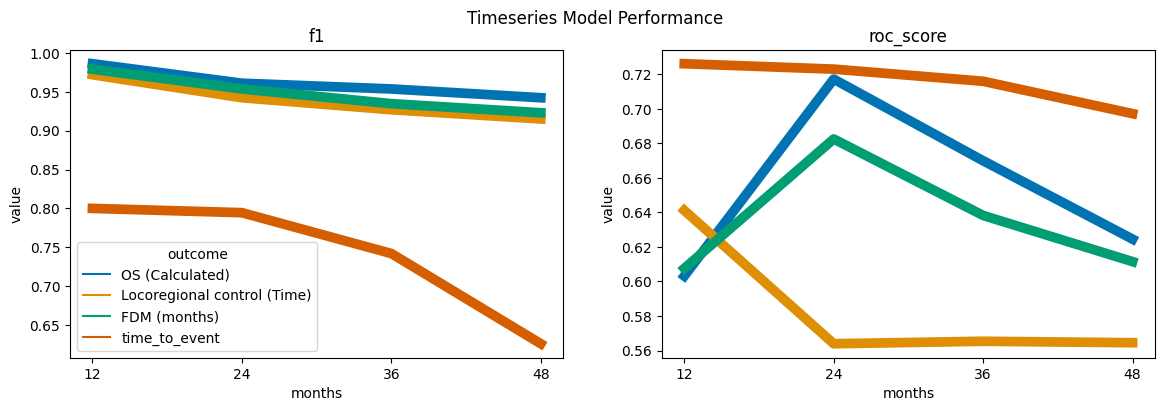

In [71]:
plot_timeseries_outcomes(result_df(best_results['metrics']))

In [68]:
torch.save(best_results['model'],main_file)

In [100]:
from DeepSurvivalModels import *

bm= train_dsm(data,dist='Weibull',k=3,layers=[100],activation='Sigmoid',elbo=False)
bm[0].time_to_event(xtr,n_samples=1)[0]

best pretrain loss 10055.557072009233 epochs 3449
val loss 1.9759784693706217
val metrics {'OS (Calculated)': {12: {'roc_score': 0.30244755244755245, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.643048128342246, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6963260619977039, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6412213740458016, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.42266187050359716, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.3812022900763359, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.44645669291338586, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.4403927068723703, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.3144208037825059, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.4161882893226177, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 

val loss 1.882563245254973
val metrics {'OS (Calculated)': {12: {'roc_score': 0.3898601398601399, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6417112299465241, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6618828932261767, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6273854961832062, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5503597122302158, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.49952290076335876, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5299212598425197, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5231416549789621, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.41252955082742315, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5470723306544202, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6012058570198104, 'f1': 0.9347826086956522, 'matt

val loss 1.8704269596151097
val metrics {'OS (Calculated)': {12: {'roc_score': 0.4125874125874126, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.6116310160427807, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6257175660160735, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6135496183206107, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5701438848920863, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5152671755725191, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5366141732283465, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5406732117812061, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.45744680851063824, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5981630309988518, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6261843238587426, 'f1': 0.9347826086956522, 'matt

val loss 1.8678770946042946
val metrics {'OS (Calculated)': {12: {'roc_score': 0.43006993006993005, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5969251336898396, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.6159586681974741, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6178435114503816, 'f1': 0.9424460431654677, 'matthews': 0.0}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5629496402877698, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5190839694656488, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5338582677165354, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5445301542776999, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.4420803782505911, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5665901262916189, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.6145564168819982, 'f1': 0.9347826086956522, 'matt

val loss 1.8764729776261273
val metrics {'OS (Calculated)': {12: {'roc_score': 0.45629370629370625, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.554144385026738, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.5763490241102182, 'f1': 0.9537366548042704, 'matthews': 0.0}, 48: {'roc_score': 0.6040076335877863, 'f1': 0.9347826086956521, 'matthews': -0.04104453503547053}}, 'Locoregional control (Time)': {12: {'roc_score': 0.572841726618705, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.5085877862595419, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.5066929133858267, 'f1': 0.927007299270073, 'matthews': 0.0}, 48: {'roc_score': 0.5291023842917252, 'f1': 0.915129151291513, 'matthews': 0.0}}, 'FDM (months)': {12: {'roc_score': 0.42316784869976365, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.5332950631458093, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: {'roc_score': 0.5934539190353143, 'f1': 0.9347826

val loss 1.881277568178945
val metrics {'OS (Calculated)': {12: {'roc_score': 0.486013986013986, 'f1': 0.9862068965517241, 'matthews': 0.0}, 24: {'roc_score': 0.5093582887700534, 'f1': 0.9611307420494699, 'matthews': 0.0}, 36: {'roc_score': 0.5304247990815154, 'f1': 0.9462365591397849, 'matthews': -0.03658055360021776}, 48: {'roc_score': 0.5658396946564885, 'f1': 0.9304029304029305, 'matthews': 0.05492246100579451}}, 'Locoregional control (Time)': {12: {'roc_score': 0.5773381294964028, 'f1': 0.9720279720279721, 'matthews': 0.0}, 24: {'roc_score': 0.4952290076335878, 'f1': 0.9424460431654677, 'matthews': 0.0}, 36: {'roc_score': 0.4968503937007874, 'f1': 0.9304029304029303, 'matthews': 0.20855011552365899}, 48: {'roc_score': 0.5189340813464236, 'f1': 0.9104477611940298, 'matthews': 0.07027129688546671}}, 'FDM (months)': {12: {'roc_score': 0.42316784869976365, 'f1': 0.9791666666666666, 'matthews': 0.0}, 24: {'roc_score': 0.4879448909299655, 'f1': 0.9537366548042704, 'matthews': 0.0}, 36: 

tensor([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, nan, inf, inf, nan, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, i

In [101]:
times = bm[0].time_to_event(xtr,n_samples=1)[0]
for i,time in enumerate(times):
    print(time.item(), bm[0](xtr,t=time.item())[0][0][i].item())
times

lmeans tensor([[       inf,        inf, 6.4336e+34],
        [1.0002e+00,        inf,        inf],
        [       inf, 1.0000e+00,        inf],
        ...,
        [       inf,        inf,        inf],
        [       inf,        inf,        inf],
        [       inf,        inf,        inf]], grad_fn=<StackBackward0>) logits tensor([[0.3333, 0.3329, 0.3338],
        [0.3332, 0.3333, 0.3336],
        [0.3334, 0.3329, 0.3337],
        ...,
        [0.3336, 0.3329, 0.3335],
        [0.3333, 0.3329, 0.3338],
        [0.3335, 0.3330, 0.3335]], grad_fn=<ExpBackward0>)
lmeans tensor([[inf, inf, inf],
        [1., inf, 1.],
        [inf, inf, inf],
        ...,
        [inf, 1., inf],
        [inf, inf, inf],
        [inf, 1., inf]], grad_fn=<StackBackward0>) logits tensor([[0.3338, 0.3340, 0.3322],
        [0.3340, 0.3341, 0.3319],
        [0.3336, 0.3341, 0.3323],
        ...,
        [0.3337, 0.3341, 0.3321],
        [0.3338, 0.3340, 0.3323],
        [0.3338, 0.3340, 0.3322]], grad_fn=<E

tensor([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, nan, inf, inf, nan, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
        inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, i

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(20,10))
i = 0
titles= Const.timeseries_outcomes
for row in range(axes.shape[0]):
    for col in range(axes.shape[1]):
        scurves = torch.stack(curves[i],axis=-1).detach().cpu().numpy()
        for ii in range(scurves.shape[0]):
            axes[row][col].plot(times,scurves[ii],color='black',alpha=.1,linewidth=2)
        axes[row][col].set_title(titles[i])
        axes[row][col].set_xlabel('Weeks')
        axes[row][col].set_ylabel('Survival %')
        i += 1